In [79]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastai.test_utils import *
# from torchvision.models.efficientnet import efficientnet_b0, efficientnet_b2

In [80]:
DATASET_PATH = Path ('datasets/train')

In [81]:
drowsiness_datablock = DataBlock(
    get_items = get_image_files,
    get_y = parent_label,
    blocks = (ImageBlock, CategoryBlock),
    item_tfms = RandomResizedCrop(224, min_scale = 0.3),
    splitter = RandomSplitter(valid_pct = 0.2, seed = 100),
    batch_tfms = aug_transforms(mult = 3, min_scale=0.8)
)

In [82]:
# used to test if the parent_label fucntion can work
# parent_label(DATASET_PATH)

In [83]:
dls = drowsiness_datablock.dataloaders(DATASET_PATH)
xb, yb = dls.one_batch()
print(f"Input shape: {xb.shape}, target shape: {yb.shape}.")

# models.EfficientNet_V2_S_Weights

Input shape: torch.Size([64, 3, 224, 224]), target shape: torch.Size([64]).


In [84]:
learn = vision_learner(dls, models.efficientnet_b0, metrics = accuracy, pretrained=True)

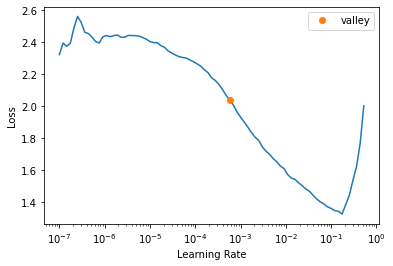

In [85]:
rate = learn.lr_find()

In [86]:
learn.fit_one_cycle(18, rate)

epoch,train_loss,valid_loss,accuracy,time
0,1.785032,0.661989,0.677586,02:52
1,1.256176,0.283149,0.875862,01:16
2,0.955798,0.212413,0.912069,00:55
3,0.752162,0.184142,0.920690,01:04
4,0.674348,0.206666,0.910345,01:12
5,0.606571,0.230739,0.898276,01:19
6,0.534228,0.148988,0.936207,00:51
7,0.501711,0.152530,0.934483,00:33
8,0.470275,0.173880,0.927586,00:27
9,0.441823,0.136413,0.937931,00:27


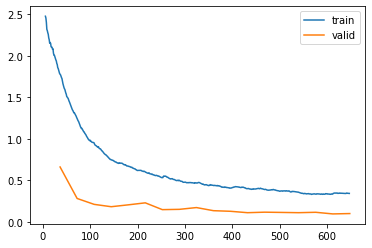

In [87]:
learn.recorder.plot_loss()

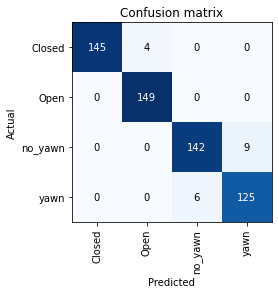

In [88]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

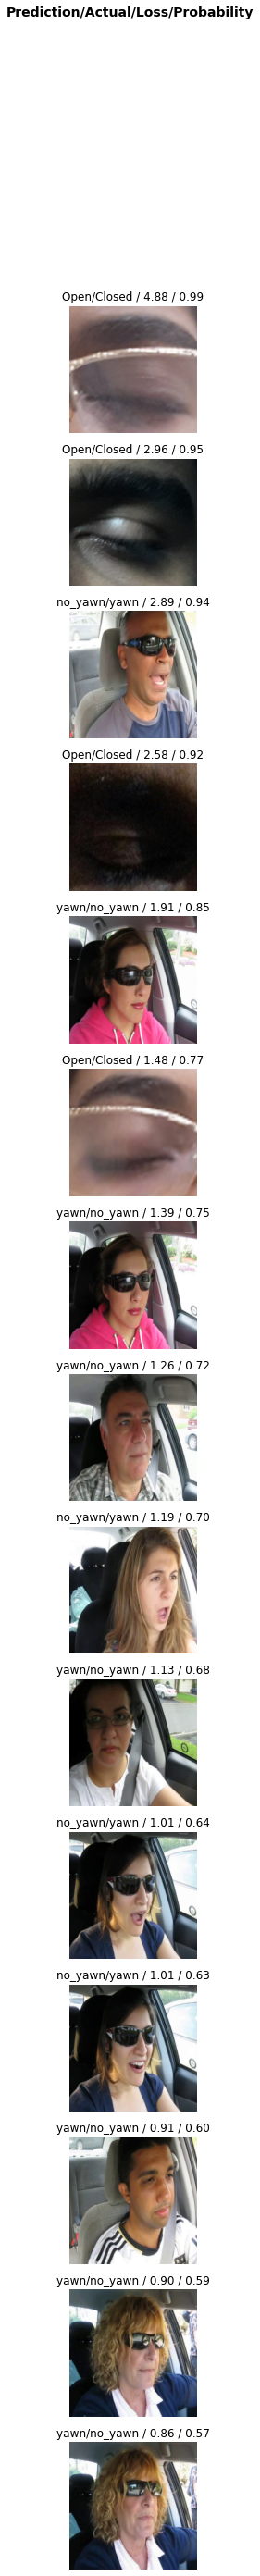

In [89]:
interp.plot_top_losses(15, nrows = 15)

In [90]:
learn.recorder.summary()

Sequential (Input shape: 64 x 3 x 218 x 218)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 32 x 109 x 109 
Conv2d                                    864        False     
BatchNorm2d                               64         True      
SiLU                                                           
Conv2d                                    288        False     
BatchNorm2d                               64         True      
SiLU                                                           
____________________________________________________________________________
                     64 x 32 x 1 x 1     
AdaptiveAvgPool2d                                              
____________________________________________________________________________
                     64 x 8 x 1 x 1      
Conv2d                                    264        False     
____________________________________________________________________________
                     6